In [1]:
# the standard package imports 
# this file was created referencing work from Dana Karwas dlk253, Baily Griswold bg1672, Jon Toy, and Christian Rosado   

%pylab inline

import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
import csv
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats

import zipfile
import os

Populating the interactive namespace from numpy and matplotlib


In [3]:
period = '201508'
!curl -O "https://s3.amazonaws.com/tripdata/{period}-citibike-tripdata.zip"
zf = zipfile.ZipFile(period+'-citibike-tripdata.zip')
df = pd.read_csv(zf.open(period+'-citibike-tripdata.csv'))
df.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 36.2M  100 36.2M    0     0  27.9M      0  0:00:01  0:00:01 --:--:-- 32.1M


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1202,8/1/2015 00:00:04,8/1/2015 00:20:07,168,W 18 St & 6 Ave,40.739713,-73.994564,385,E 55 St & 2 Ave,40.757973,-73.966033,23253,Subscriber,1987.0,1
1,301,8/1/2015 00:00:05,8/1/2015 00:05:06,450,W 49 St & 8 Ave,40.762272,-73.987882,479,9 Ave & W 45 St,40.760193,-73.991255,22675,Subscriber,1951.0,2
2,431,8/1/2015 00:00:06,8/1/2015 00:07:18,312,Allen St & E Houston St,40.722055,-73.989111,296,Division St & Bowery,40.714131,-73.997047,19831,Subscriber,1985.0,1
3,273,8/1/2015 00:00:09,8/1/2015 00:04:43,382,University Pl & E 14 St,40.734927,-73.992005,229,Great Jones St,40.727434,-73.993790,22765,Subscriber,1975.0,1
4,1256,8/1/2015 00:00:17,8/1/2015 00:21:13,352,W 56 St & 6 Ave,40.763406,-73.977225,432,E 7 St & Avenue A,40.726218,-73.983799,22127,Subscriber,1978.0,1


In [4]:
df['age'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber')]

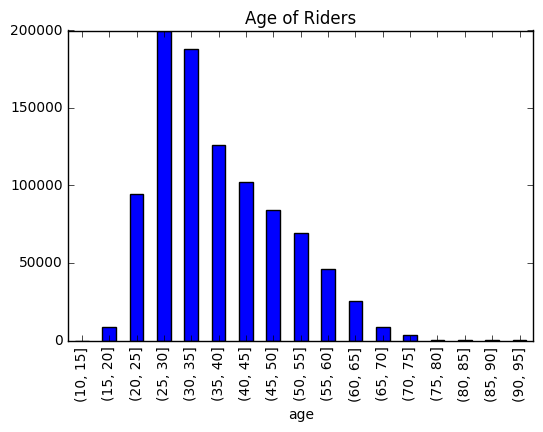

In [5]:
bins = np.arange(10,99,5)
axM = df.age.groupby(pd.cut(df.age, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("Age of Riders")

In [6]:
df['age_new'] = 2016 - df['birth year'][(df['usertype'] == 'Subscriber')]

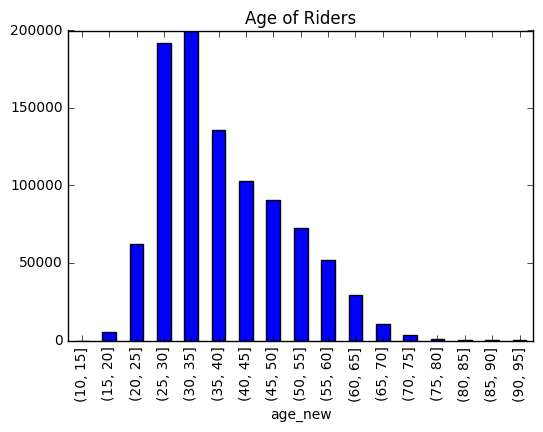

In [7]:
bins = np.arange(10,99,5)
axM = df.age_new.groupby(pd.cut(df.age_new, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("Age of Riders")